#### Частина 1. Data Cleaning and EDA

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

import random
random.seed(42) 

import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
data_path = "ab_test.csv"
if os.path.exists(data_path):
    df = pd.read_csv(data_path) #  encode = 'utf-8'
else:
    raise NameError(f'File {data_path} not found')

In [9]:
df.head()

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [10]:
df.columns = ["user_id", "timestamp", "group", "landing_page", "converted"] # rename
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [40]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [11]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [39]:
# np.isinf(df).any()

In [12]:
df.tail(2)

,user_id,timestamp,group,landing_page,converted
294476,697314,20:29.0,control,old_page,0
294477,715931,40:24.5,treatment,new_page,0


In [13]:
df.sample(4)

,user_id,timestamp,group,landing_page,converted
35945,732348,34:31.1,control,old_page,0
122547,676303,25:03.7,treatment,new_page,0
201529,911506,53:50.3,control,old_page,0
231571,689017,15:19.2,control,old_page,0


In [14]:
df.shape

(294478, 5)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [16]:
df['timestamp'].max(), df['timestamp'].min()

('59:59.9', '00:00.0')

In [17]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [18]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [23]:
convert_df = df.groupby('landing_page')['converted'].sum().reset_index()

In [24]:
convert_df

,landing_page,converted
0,new_page,17498
1,old_page,17739


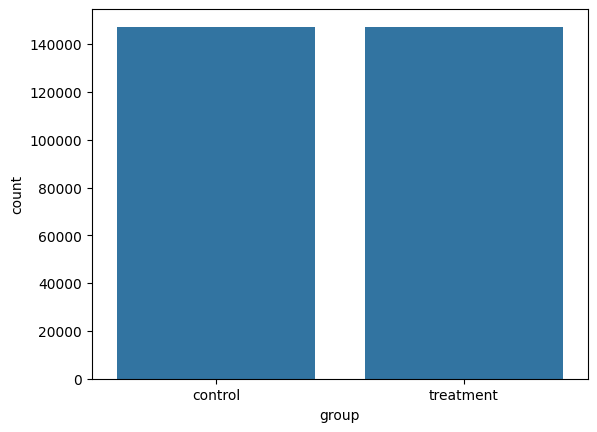

In [20]:
sns.countplot(x = df['group']);

In [30]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [31]:
df.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0


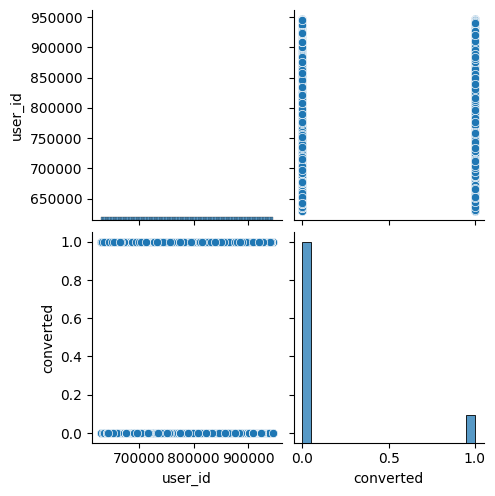

In [26]:
sns.pairplot(df);

In [35]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of unique users: {df.user_id.nunique()}')

Number of rows: 294478
Number of unique users: 290584


In [41]:
# Чи збігаються номери new_page та treatment?
n_treat = df[df["group"] == "treatment"].shape[0]
n_new_page = df[df["landing_page"] == "new_page"].shape[0]
difference = n_treat - n_new_page

pd.DataFrame({
    'N treatment': [n_treat],
    'N new_page': [n_new_page],
    'Difference': [difference]
})

,N treatment,N new_page,Difference
0,147276,147239,37


In [42]:
# unmatch 
df[(df["group"] == "treatment") & (df["landing_page"] == "old_page")]

,user_id,timestamp,group,landing_page,converted
308,857184,34:59.8,treatment,old_page,0
327,686623,26:40.7,treatment,old_page,0
357,856078,29:30.4,treatment,old_page,0
685,666385,11:54.8,treatment,old_page,0
713,748761,47:44.4,treatment,old_page,0
...,...,...,...,...,...
293773,688144,34:50.5,treatment,old_page,1
293817,876037,15:09.0,treatment,old_page,1
293917,738357,37:55.7,treatment,old_page,0
294014,813406,25:33.2,treatment,old_page,0


In [43]:
df_mismatch = df[(df["group"] == "treatment") & (df["landing_page"] == "old_page")
               |(df["group"] == "control") & (df["landing_page"] == "new_page")]

n_mismatch = df_mismatch.shape[0]

percent_mismatch = round(n_mismatch / len(df) * 100, 2)
print(f'Number of mismatched rows: {n_mismatch} rows')
print(f'Percent of mismatched rows: {percent_mismatch} percent')

Number of mismatched rows: 3893 rows
Percent of mismatched rows: 1.32 percent


In [45]:
df2 = df[(df["group"] == "treatment") & (df["landing_page"] == "new_page")
        |(df["group"] == "control") & (df["landing_page"] == "old_page")]

len(df2), len(df)

(290585, 294478)

In [ ]:
# df2

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1
...,...,...,...,...,...
294473,751197,28:38.6,control,old_page,0
294474,945152,51:57.1,control,old_page,0
294475,734608,45:03.4,control,old_page,0
294476,697314,20:29.0,control,old_page,0


In [47]:
df2['user_id'].value_counts()

user_id
773192    2
851104    1
688307    1
718297    1
838144    1
         ..
755610    1
804629    1
837875    1
889019    1
715931    1
Name: count, Length: 290584, dtype: int64

In [46]:
df2[df2.duplicated("user_id") == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,55:59.6,treatment,new_page,0


#### Частина 2. Probability

In [48]:
df2.converted.mean() * 100

np.float64(11.959667567149026)

In [63]:
df2.user_id = df2.user_id.astype(str)
# df2.groupby("group").mean()

In [65]:
df2.groupby('group')['converted'].mean() * 100.0

group
control      12.038630
treatment    11.880725
Name: converted, dtype: float64

In [70]:
df2.groupby("group")['user_id'].count()

group
control      145274
treatment    145311
Name: user_id, dtype: int64

In [51]:
pd.DataFrame(df2.landing_page.value_counts(normalize = True) * 100)

,proportion
landing_page,
new_page,50.006366
old_page,49.993634


> Чи є достатньо доказів, щоб зробити висновок, що нова сторінка призводить до більшої кількості конверсій? \
> Імовірність того, що особа отримала нову сторінку, становить 50%. \
> Імовірність того, що особа здійснить конверсію незалежно від сторінки, яку вона отримала, становить 11,96%. \
> Враховуючи, що особа перебувала в контрольній групі, ймовірність її конверсії становить 12,04%. \
> Враховуючи, що особа перебувала в групі , ймовірність її конверсії становить 11,88%. \
> 1 до 4 свідчить про те, що між групою  та контрольною групою немає істотної різниці в конверсії. Отже, ми можемо зробити висновок, що нова сторінка  не має впливу і не призводить до збільшення кількості конверсій.


#### Частина 3. A/B Test

In [68]:
means_diff = []
size = df.shape[0]
for _ in range(10_00):
    sample = df2.sample(size, replace = True)
    control_mean = sample[sample["group"] == "control"]["converted"].mean()
    treat_mean = sample[sample["group"] == "treatment"]["converted"].mean()
    means_diff.append(treat_mean - control_mean)

In [90]:
means_diff = np.array(means_diff)
null_vals = np.random.normal(0, means_diff.std(), means_diff.size)

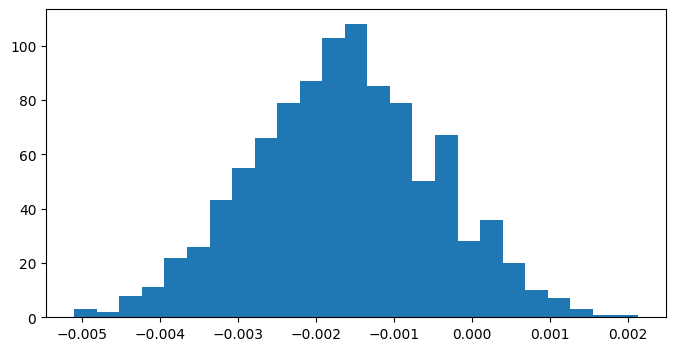

In [73]:
plt.figure(figsize = (8,4), dpi = 100)
plt.hist(means_diff, bins = 25)
plt.show()

In [38]:
# plt.figure(figsize = (8,4), dpi = 100)
# plt.hist(null_vals, bins = 25)
# plt.show()

In [37]:
control_mean = df2[df2["group"] == "control"]["converted"].mean()
treat_mean = df2[df2["group"] == "treatment"]["converted"].mean()
obs_diff = treat_mean - control_mean

plt.figure(figsize = (8,4), dpi = 100)
plt.hist(null_vals, bins = 25)
plt.axvline(obs_diff, c='red')
plt.show()

NameError: name 'df2' is not defined

In [ ]:
(null_vals > obs_diff).mean()

In [76]:
pd.crosstab(df2["group"], df2["landing_page"])

landing_page,new_page,old_page
group,,
control,0,145274
treatment,145311,0


In [78]:
conv = df2.groupby("group")["converted"].agg(["sum", "count"])
conv

,sum,count
group,,
control,17489,145274
treatment,17264,145311


In [80]:
control = df2[df2.group == "control"]["converted"]
treat   = df2[df2.group == "treatment"]["converted"]

In [81]:
n_c = len(control)
n_t = len(treat)

x_c = control.sum()
x_t = treat.sum()

In [83]:
# Рахуємо конверсію 
p_c = x_c / n_c
p_t = x_t / n_t

p_c, p_t, p_t - p_c


(np.float64(0.1203863045004612),
 np.float64(0.11880724790277405),
 np.float64(-0.0015790565976871451))

In [84]:
from scipy.stats import norm

p_pool = (x_c + x_t) / (n_c + n_t)

se = np.sqrt(p_pool * (1 - p_pool) * (1/n_c + 1/n_t))

z = (p_t - p_c) / se

p_value = 2 * (1 - norm.cdf(abs(z)))

z, p_value


(np.float64(-1.3116075339133115), np.float64(0.18965258971881793))

In [85]:
table = np.array([
    [control.sum(), control.count() - control.sum()],
    [treat.sum(),   treat.count()   - treat.sum()]
])

table

array([[ 17489, 127785],
       [ 17264, 128047]])

In [ ]:
# Chi2
# H0 - між А і B в нас не має 
# H1 - різниця є
# x^2 = sum(O - E^2 / E)
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(table) # a = 0.05 
chi2, p_value


(np.float64(1.7053502645115), np.float64(0.19158976298516012))

In [87]:
# Fisher 
from scipy.stats import fisher_exact

odds_ratio, p_value = fisher_exact(table)
odds_ratio, p_value


(np.float64(1.0151099413319618), np.float64(0.19047607131914912))

In [ ]:
mde = (z_alpha + z_beta) * np.sqrt(2 * p0 * (1 - p0) / n)

mde

---
#### Self practise

In [ ]:
# Index
# user id User ID (unique)

# test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement

# converted: If a person bought the product then True, else is False

# total ads: Amount of ads seen by person

# most ads day: Day that the person saw the biggest amount of ads

# most ads hour: Hour of day that the person saw the biggest amount of ads

---
#### Part 1. Data Cleaning and EDA

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
df = pd.read_csv('marketing_AB.csv')
df.columns
#df
#df.columns = ['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
#       'most ads day', 'most ads hour']

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

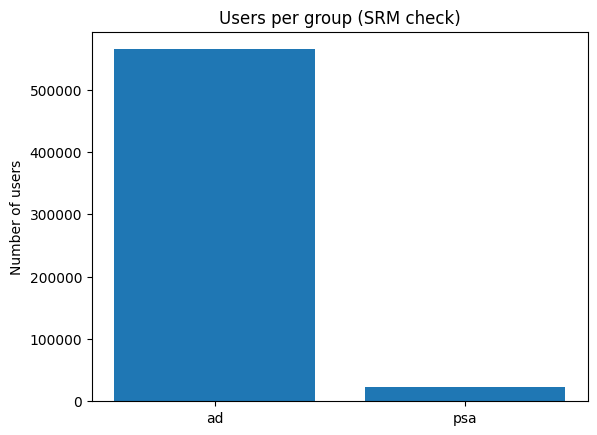

In [8]:
# SRM
import matplotlib.pyplot as plt

group_counts = df["test group"].value_counts()

plt.bar(group_counts.index, group_counts.values)
plt.title("Users per group (SRM check)")
plt.ylabel("Number of users")
plt.show()


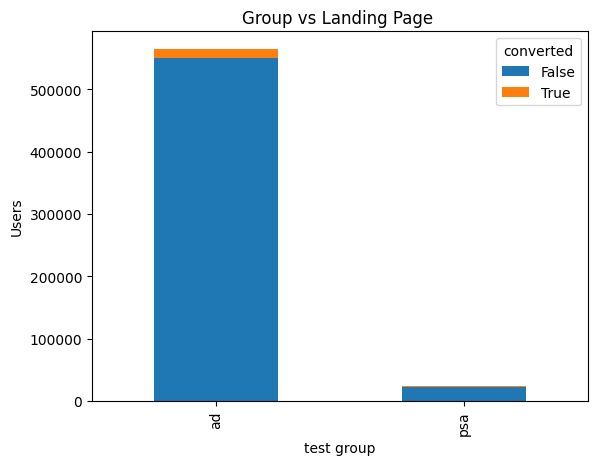

In [9]:
ct = pd.crosstab(df["test group"], df["converted"])
ct.plot(kind="bar", stacked=True)
plt.title("Group vs Landing Page ")
plt.ylabel("Users")
plt.show()

In [31]:
# Check NaN, Inf, Null, Duplicated 
# 1. Перевірка на Null / NaN (порожні значення)
# print("--- Пропуски (Null/NaN) ---")
# print(df.isnull().sum())

# 2. Перевірка на Inf (нескінченність)
# Працює для числових колонок
# print("\n--- Нескінченні значення (Inf) ---")
# inf_count = np.isinf(df.select_dtypes(include=[np.number])).sum()
# print(inf_count)

# 3. Перевірка на дублікати
# print("\n--- Кількість дублікатів ---")
# print(f"Повних дублікатів: {df.duplicated().sum()}")


# Create variable df_clear -> save result after cleaning
# 1. Замінюємо нескінченні значення (inf) на NaN, щоб їх можна було видалити
df_clear = df.replace([np.inf, -np.inf], np.nan)

# 2. Видаляємо рядки, що містять порожні значення (Null/NaN)
df_clear = df_clear.dropna()

# 3. Видаляємо дублікати (однакові рядки)
df_clear = df_clear.drop_duplicates()

print('Old db', df.isnull().sum())
print('New db', df_clear.isnull().sum())
df_clear = df_clear.drop(columns=['Unnamed: 0'])


Old db Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64
New db Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64


In [32]:
duplicate_users = df_clear['user id'].duplicated().sum()
print(f"Кількість повторних ID: {duplicate_users}")

#df_clear = df_clear.drop_duplicates(subset='user id')

Кількість повторних ID: 0


In [33]:
print(df_clear[['total ads', 'most ads hour']].describe())

           total ads  most ads hour
count  588101.000000  588101.000000
mean       24.820876      14.469061
std        43.715181       4.834634
min         1.000000       0.000000
25%         4.000000      11.000000
50%        13.000000      14.000000
75%        27.000000      18.000000
max      2065.000000      23.000000


In [ ]:
# ВИСНОВКИ
# Було проведено перевірку на наявність пропусків (NaN), нескінченних значень (Inf) та дублікатів. Дані виявилися без пропусків
# Стовпець Unnamed: 0  було видалено
# Це дозволяє переходити до аналізу без втрати значущої кількості інформації.

---
#### Part 2. Probability

converted
False    0.974761
True     0.025239
Name: proportion, dtype: float64


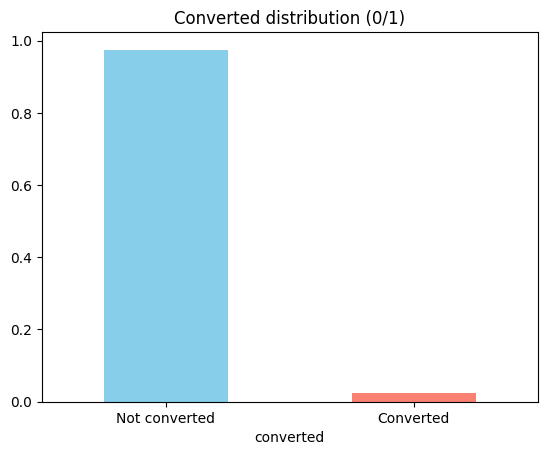

In [36]:
#df_clean["choose columns"]. # use value_counts() * check normalize 
# conversion_counts = df_clear["most ads day"].value_counts(normalize=True)
conversion_counts = df_clear["converted"].value_counts(normalize=True)
print(conversion_counts)

# Будуємо графік
conversion_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Converted distribution (0/1)")
plt.xticks([0,1], ["Not converted", "Converted"], rotation=0)
plt.show()


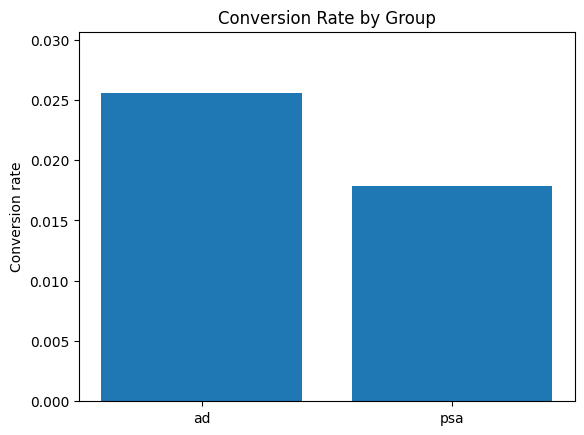

In [34]:
# task
#cr = df_clear. # calculate group converted mean
cr = df_clear.groupby("test group")["converted"].mean()
plt.bar(cr.index, cr.values)
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion rate")
plt.ylim(0, cr.max() * 1.2)
plt.show()


In [45]:
print(df_clear.converted.mean() * 100)

#df_clear.user_id = df_clear.user_id.astype(str)
print(df_clear.groupby('test group')['converted'].mean() * 100.0)
print(pd.DataFrame(df_clear.converted.value_counts(normalize = True) * 100))



2.523886203220195
test group
ad     2.554656
psa    1.785411
Name: converted, dtype: float64
           proportion
converted            
False       97.476114
True         2.523886


ВИСНОВКИ   
Перший графік чітко показує, що переважна більшість користувачів не здійснила покупку
Середній показник конверсії по всьому датасету становить 2.52%. Це означає, що лише кожен 40-й користувач здійснив покупку  
Ефективність груп:    
Група ad (реклама) показала конверсію 2.55%.     
Група psa (контрольна група) показала конверсію 1.78%.   
Результат: Перегляд реальної реклами виявився ефективнішим за показ соціальних оголошень.

---
#### Part 3. A/B test

In [ ]:
# Порахувати: Конверсія та uplift
cr_ad = df_clear[df_clear['test group'] == 'ad']['converted'].mean()
cr_psa = df_clear[df_clear['test group'] == 'psa']['converted'].mean()
uplift = cr_ad - cr_psa

print(cr_ad)
print(cr_psa)
from scipy.stats import normprint(uplift)

0.025546559636683747
0.01785410644448223
0.007692453192201517


In [58]:
from scipy.stats import norm
from scipy.stats import chi2_contingency

# Зробити chi^2 test, bootstrap, z-test
control = df_clear[df_clear['test group'] == 'ad']['converted']
treat   = df_clear[df_clear['test group'] == 'psa']['converted']

n_c = len(control)
n_t = len(treat)

x_c = control.sum()
x_t = treat.sum()

p_c = x_c / n_c
p_t = x_t / n_t

p_pool = (x_c + x_t) / (n_c + n_t)

se = np.sqrt(p_pool * (1 - p_pool) * (1/n_c + 1/n_t))

z = (p_t - p_c) / se

p_value = 2 * (1 - norm.cdf(abs(z)))

print('Z-test')
print('z=', z,'p_value=', p_value)

table = np.array([
    [control.sum(), control.count() - control.sum()],
    [treat.sum(),   treat.count()   - treat.sum()]
])

chi2, p_value, dof, expected = chi2_contingency(table)
print('chi^2 test')
print('chi^2=', chi2, 'p_value=', p_value)

def bootstrap_diff(a, b, n_boot=10000):
    diffs = []
    for _ in range(n_boot):
        a_sample = np.random.choice(a, size=len(a), replace=True)
        b_sample = np.random.choice(b, size=len(b), replace=True)
        diffs.append(b_sample.mean() - a_sample.mean())
    return np.percentile(diffs, [2.5, 97.5])

ci = bootstrap_diff(control.values, treat.values)
print('Bootstrap ',ci)




Z-test
z= -7.3700781265454145 p_value= 1.7053025658242404e-13
chi^2 test
chi^2= 54.005823883685245 p_value= 1.9989623063390075e-13
Bootstrap  [-0.00941764 -0.00591227]


Z-test   
z= -7.3700781265454145 p_value= 1.7053025658242404e-13   
chi^2 test   
chi^2= 54.005823883685245 p_value= 1.9989623063390075e-13  
Bootstrap  [-0.00941764 -0.00591227]  
   
Висновки     
Висока статистична значущість: Показники p-value в обох тестах практично дорівнюють нулю. Це означає, що ймовірність отримати таку різницю між групами випадково дуже мала.    
Підтвердження ефекту реклами:    
Z-test (-7.37) та chi^2 test (54.0) вказують на суттєвий розрив між вибірками.    
Bootstrap [-0.0094, -0.0059] підтверджує результат: 95% довірчий інтервал різниці конверсій лежить повністю нижче нуля , що доводить стабільність переваги рекламної групи.    
Надійність висновків: Оскільки всі три методи (параметричні Z і chi^2 та непараметричний Bootstrap) дали узгоджені результати, висновок про ефективність реклами є математично обґрунтованим і достовірним.   
Резюме: Рекламна кампанія має реальний позитивний вплив на конверсію. Ефект не є випадковим, і результати можна використовувати для прийняття бізнес-рішень.